# MLM statistics + visualization #

This notebook is used for multilevel linear analysis for fractional occupancy and dwell time for each state. 

Number of states: 8

**Last update:** 12.08.2022

### Step 1: Loading libraries ###

In [1]:
#Loading libraries
library(readr)
library(magrittr)
library(dplyr)
library(lme4)
library(lmerTest)
library(emmeans)
library(sjPlot)
library(sjmisc)
library(ggplot2)
library(RColorBrewer)
library(pbkrtest)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




### Step 1: Loading data ###

In [2]:
#Loading csv data
data <- read_csv("data/8_states/8_df_merge.csv", show_col_types = FALSE)

#Changing the names of columns
colnames(data)[5] <- "FO"
colnames(data)[6] <- "DT"

#Loading data as categorical
data$Subject <- as.factor(data$Subject)
data$Session <- as.factor(data$Session)
data$Run <- as.factor(data$Run)
data$State <- as.factor(data$State)

In [6]:
#Printing data
head(data)

Subject,Session,Run,State,FO,DT
<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
0,PLCB,1,1,16.589862,5.142857
0,PLCB,1,2,9.677419,4.666667
0,PLCB,1,3,15.207373,5.500000
0,PLCB,1,4,8.294931,5.142857
0,PLCB,1,5,11.981567,5.777778
0,PLCB,1,6,13.824885,6.000000


--------------------------

### **Resting-state vs. music listening** ###

In [7]:
#Selecting data from run 1 & 2
s8_data_run12 <- filter(data, Run != 3)

### Step 2: Performing analysis for fractional occupancy ###

In [31]:
#Iterating over states

for (i in 1:8) {
    
    s8_data_fo_state <- filter(s8_data_run12, State == i)
    
    print(paste("MLM for state:", i))
    s8_m_fo <- lmer(FO ~ Run*Session + (1 + Run + Session|Subject), data=s8_data_fo_state) #performing MLM analysis
    s8_stats_fo <- anova(s8_m_fo)
    print(s8_stats_fo)
    
    }

[1] "MLM for state: 1"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run          5.7005  5.7005     1 12.365  1.0417 0.3270
Session     15.2267 15.2267     1 13.773  2.7824 0.1179
Run:Session  1.0277  1.0277     1 25.828  0.1878 0.6684
[1] "MLM for state: 2"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value   Pr(>F)   
Run           1.765   1.765     1 14.023  0.1796 0.678134   
Session     130.830 130.830     1 28.575 13.3151 0.001045 **
Run:Session   2.254   2.254     1 25.383  0.2294 0.636077   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "MLM for state: 3"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value  Pr(>F)  
Run          4.5457  4.5457     1 11.504  0.8185 0.38417  
Session     28.6798 28.6798     1 15.267  5.1643 0.03792 *
Run:Session  1.0685  1.0685     1 24.958  0.1924 0.66470  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "MLM for state: 4"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value  Pr(>F)  
Run         26.6261 26.6261     1 12.696  4.5933 0.05208 .
Session     27.5862 27.5862     1 20.428  4.7590 0.04099 *
Run:Session  0.4238  0.4238     1 23.869  0.0731 0.78920  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "MLM for state: 5"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         13.8036 13.8036     1 16.378  1.4343 0.2481
Session      0.1173  0.1173     1 21.128  0.0122 0.9131
Run:Session  0.6597  0.6597     1 24.732  0.0685 0.7956
[1] "MLM for state: 6"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value   Pr(>F)   
Run          51.48   51.48     1 38.469  6.3466 0.016031 * 
Session     103.20  103.20     1 31.382 12.7231 0.001183 **
Run:Session   6.35    6.35     1 36.393  0.7828 0.382100   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "MLM for state: 7"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value  Pr(>F)  
Run         11.3073 11.3073     1 25.143  1.7464 0.19823  
Session     21.2419 21.2419     1 13.091  3.2807 0.09309 .
Run:Session  2.5336  2.5336     1 24.850  0.3913 0.53732  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "MLM for state: 8"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
Run          0.071   0.071     1 12.698  0.0163 0.9004492    
Session     77.742  77.742     1 14.391 17.7926 0.0008118 ***
Run:Session  2.094   2.094     1 24.250  0.4793 0.4953096    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Post-hoc tests ###

In [18]:
#Post-hoc for state 2
em_fo = emmeans(s8_m_fo, specs = pairwise ~ Session)
em_fo$emmeans
em_fo$contrasts

NOTE: Results may be misleading due to involvement in interactions



 Session emmean    SE   df lower.CL upper.CL
 LSD       15.0 0.732 13.1     13.4     16.6
 PLCB      11.8 0.787 13.2     10.1     13.5

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

 contrast   estimate    SE   df t.ratio p.value
 LSD - PLCB     3.15 0.876 13.2   3.598  0.0032

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 

In [20]:
#Post-hoc for state 3
em_fo = emmeans(s8_m_fo, specs = pairwise ~ Session)
em_fo$emmeans
em_fo$contrasts

NOTE: Results may be misleading due to involvement in interactions



 Session emmean    SE   df lower.CL upper.CL
 LSD         15 0.881 13.8     13.1     16.8
 PLCB        13 0.520 13.3     11.9     14.1

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

 contrast   estimate    SE   df t.ratio p.value
 LSD - PLCB     1.98 0.877 13.7   2.253  0.0412

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 

In [22]:
#Post-hoc for state 4
em_fo = emmeans(s8_m_fo, specs = pairwise ~ Session)
em_fo$emmeans
em_fo$contrasts

NOTE: Results may be misleading due to involvement in interactions



 Session emmean    SE   df lower.CL upper.CL
 LSD       9.48 0.691 13.2     7.99     11.0
 PLCB     11.02 0.742 13.1     9.42     12.6

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

 contrast   estimate    SE   df t.ratio p.value
 LSD - PLCB    -1.54 0.716 13.3  -2.153  0.0502

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 

In [30]:
#Post-hoc for state 6
em_fo = emmeans(s8_m_fo, specs = pairwise ~ Session)
em_fo$emmeans
em_fo$contrasts

em_fo = emmeans(s8_m_fo, specs = pairwise ~ Run)
em_fo$emmeans
em_fo$contrasts

NOTE: Results may be misleading due to involvement in interactions



 Session emmean    SE   df lower.CL upper.CL
 LSD       9.94 0.669 13.3      8.5     11.4
 PLCB     12.79 0.595 13.1     11.5     14.1

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

 contrast   estimate    SE   df t.ratio p.value
 LSD - PLCB    -2.84 0.808 13.2  -3.518  0.0037

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 

NOTE: Results may be misleading due to involvement in interactions



 Run emmean    SE   df lower.CL upper.CL
 1     10.4 0.613 14.0     9.05     11.7
 2     12.4 0.651 11.2    10.93     13.8

Results are averaged over the levels of: Session 
Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

 contrast    estimate    SE   df t.ratio p.value
 Run1 - Run2    -1.99 0.805 12.6  -2.478  0.0283

Results are averaged over the levels of: Session 
Degrees-of-freedom method: kenward-roger 

In [32]:
#Post-hoc for state 8
em_fo = emmeans(s8_m_fo, specs = pairwise ~ Session)
em_fo$emmeans
em_fo$contrasts

NOTE: Results may be misleading due to involvement in interactions



 Session emmean    SE   df lower.CL upper.CL
 LSD       9.66 0.551 13.3     8.47     10.8
 PLCB     13.29 0.506 13.2    12.20     14.4

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

 contrast   estimate    SE   df t.ratio p.value
 LSD - PLCB    -3.63 0.867 13.8  -4.190  0.0009

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 

### Step 3: Performing analysis for dwell time ###

In [53]:
#Iterating over states

for (i in 1:8) {
    
    s8_data_dt_state <- filter(s8_data_run12, State == i)
    
    print(paste("MLM for state:", i))
    s8_m_dt <- lmer(DT ~ Run*Session + (1+ Run + Session|Subject), data=s8_data_dt_state) #performing MLM analysis
    s8_stats_dt <- anova(s8_m_dt)
    print(s8_stats_dt)
    
    }

[1] "MLM for state: 1"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         1.50689 1.50689     1 13.708  2.3796 0.1457
Session     0.16172 0.16172     1 14.437  0.2554 0.6209
Run:Session 0.07327 0.07327     1 28.098  0.1157 0.7363
[1] "MLM for state: 2"


boundary (singular) fit: see help('isSingular')

Warning message:
“Model failed to converge with 1 negative eigenvalue: -9.3e+00”


Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value   Pr(>F)   
Run         0.0627  0.0627     1 20.131  0.0835 0.775541   
Session     6.6386  6.6386     1 33.042  8.8489 0.005446 **
Run:Session 0.0065  0.0065     1 38.864  0.0086 0.926450   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "MLM for state: 3"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.20377 0.20377     1 20.767  0.3028 0.5880
Session     1.26313 1.26313     1 16.566  1.8771 0.1889
Run:Session 0.10992 0.10992     1 36.441  0.1633 0.6885
[1] "MLM for state: 4"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value  Pr(>F)  
Run         0.8712  0.8712     1 14.320  1.1651 0.29827  
Session     0.0490  0.0490     1 17.090  0.0656 0.80098  
Run:Session 3.1958  3.1958     1 26.015  4.2736 0.04879 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "MLM for state: 5"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.25440 0.25440     1 15.210  0.3834 0.5449
Session     0.03606 0.03606     1 14.075  0.0543 0.8190
Run:Session 0.18499 0.18499     1 38.776  0.2788 0.6005
[1] "MLM for state: 6"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.06325 0.06325     1 15.427  0.0973 0.7593
Session     1.21134 1.21134     1 30.138  1.8636 0.1823
Run:Session 0.05692 0.05692     1 36.231  0.0876 0.7690
[1] "MLM for state: 7"
Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         1.56540 1.56540     1 26.062  1.8579 0.1845
Session     0.10047 0.10047     1 17.871  0.1192 0.7339
Run:Session 0.00476 0.00476     1 36.796  0.0056 0.9405
[1] "MLM for state: 8"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value   Pr(>F)   
Run         0.0828  0.0828     1 22.476  0.1152 0.737495   
Session     7.6307  7.6307     1 15.960 10.6135 0.004952 **
Run:Session 0.0253  0.0253     1 37.397  0.0352 0.852142   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [35]:
#Post-hoc for state 2
em_dt = emmeans(s8_m_dt, specs = pairwise ~ Session)
em_dt$emmeans
em_dt$contrasts

NOTE: Results may be misleading due to involvement in interactions



 Session emmean    SE   df lower.CL upper.CL
 LSD       5.19 0.186 12.7     4.79     5.59
 PLCB      4.45 0.228 13.0     3.96     4.94

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

 contrast   estimate    SE   df t.ratio p.value
 LSD - PLCB    0.741 0.252 13.3   2.935  0.0114

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 

In [52]:
#Post-hoc for state 4
em_dt = emmeans(s8_m_dt, specs = pairwise ~ Session:Run)

lsd_1 = c(1, 0, 0, 0)
plcb_1 = c(0, 1, 0, 0)
lsd_2 = c(0, 0, 1, 0)
plcb_2 = c(0, 0, 0, 1)

contrast(em_dt, method = list("LSD run 1 - placebo run 1" = lsd_1 - plcb_1, "LSD run 1 - LSD run 2" = lsd_1 - lsd_2, "placebo run 1 - placebo run 2" = plcb_1 - plcb_2, 
                              "LSD run 2 - placebo run 2" = lsd_2 - plcb_2))

I bet you wanted to call this with just object[[1]] - use '[[]]' or which' if I'm wrong.
See '? emm_list' for more information



 contrast                      estimate    SE   df t.ratio p.value
 LSD run 1 - placebo run 1        0.422 0.353 24.2   1.195  0.2437
 LSD run 1 - LSD run 2            0.825 0.387 24.0   2.131  0.0435
 placebo run 1 - placebo run 2   -0.165 0.402 23.6  -0.410  0.6857
 LSD run 2 - placebo run 2       -0.568 0.402 24.8  -1.415  0.1696

Degrees-of-freedom method: kenward-roger 

In [54]:
#Post-hoc for state 8
em_dt = emmeans(s8_m_dt, specs = pairwise ~ Session)
em_dt$emmeans
em_dt$contrasts

NOTE: Results may be misleading due to involvement in interactions



 Session emmean    SE   df lower.CL upper.CL
 LSD       4.45 0.168 13.0     4.08     4.81
 PLCB      5.33 0.206 13.5     4.89     5.77

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

 contrast   estimate    SE   df t.ratio p.value
 LSD - PLCB   -0.884 0.274 13.5  -3.222  0.0064

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 

--------------------

### **Resting-state before music listening vs. resting-state after music listening** ###

In [6]:
#Selecting data from run 1 & 3
s8_data_run13 <- filter(data, Run != 2)

### Step 4: Performing analysis for fractional occupancy ###

In [82]:
#Iterating over states

for (i in 1:8) {
    
    s8_data_fo_state <- filter(s8_data_run13, State == i)
    
    print(paste("MLM for state:", i))
    s8_m_fo <- lmer(FO ~ Run*Session + (1 + Run + Session|Subject), data=s8_data_fo_state) #performing MLM analysis
    s8_stats_fo <- anova(s8_m_fo)
    print(s8_stats_fo)
    
    }

[1] "MLM for state: 1"


boundary (singular) fit: see help('isSingular')

Warning message:
“Model failed to converge with 1 negative eigenvalue: -1.3e+00”


Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         1.0834  1.0834     1 25.309  0.2706 0.6075
Session     5.3927  5.3927     1 13.984  1.3467 0.2653
Run:Session 0.1274  0.1274     1 27.997  0.0318 0.8597
[1] "MLM for state: 2"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
Run           0.146   0.146     1 14.048  0.0174 0.8969798    
Session     147.803 147.803     1 17.214 17.6172 0.0005905 ***
Run:Session   0.227   0.227     1 28.000  0.0270 0.8706622    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "MLM for state: 3"
Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value  Pr(>F)  
Run          9.9328  9.9328     1 15.008  2.5973 0.12787  
Session     26.5780 26.5780     1 14.068  6.9497 0.01949 *
Run:Session  1.0229  1.0229     1 28.000  0.2675 0.60910  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "MLM for state: 4"
Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF DenDF F value  Pr(>F)  
Run          6.5017  6.5017     1    14  1.4012 0.25624  
Session     21.0387 21.0

boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value  Pr(>F)  
Run          4.471   4.471     1 23.187  0.5826 0.45298  
Session     59.514  59.514     1 16.577  7.7545 0.01293 *
Run:Session 21.534  21.534     1 28.000  2.8058 0.10506  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "MLM for state: 7"
Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value  Pr(>F)  
Run          2.0674  2.0674     1 13.999  0.3415 0.56827  
Session      1.0217  1.0217     1 14.000  0.1688 0.68744  
Run:Session 30.6122 30.6122     1 13.999  5.0564 0.04116 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "MLM for state: 8"
Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF DenDF F value   Pr(>F)   
Run          3.910   3.910     1    14  1.0774 0.316866   
Session     49.748  49.748     1    14 13.

In [59]:
#Post-hoc for state 2
em_fo = emmeans(s8_m_fo, specs = pairwise ~ Session)
em_fo$emmeans
em_fo$contrasts

NOTE: Results may be misleading due to involvement in interactions



 Session emmean    SE df lower.CL upper.CL
 LSD       15.4 0.679 14     13.9     16.8
 PLCB      12.0 0.551 14     10.8     13.1

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

 contrast   estimate   SE df t.ratio p.value
 LSD - PLCB     3.44 0.82 14   4.197  0.0009

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 

In [61]:
#Post-hoc for state 3
em_fo = emmeans(s8_m_fo, specs = pairwise ~ Session)
em_fo$emmeans
em_fo$contrasts

NOTE: Results may be misleading due to involvement in interactions



 Session emmean    SE df lower.CL upper.CL
 LSD       14.8 0.796 14     13.1     16.5
 PLCB      12.8 0.647 14     11.4     14.2

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

 contrast   estimate   SE df t.ratio p.value
 LSD - PLCB     1.95 0.74 14   2.636  0.0195

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 

In [78]:
#Post-hoc for state 6
em_fo = emmeans(s8_m_fo, specs = pairwise ~ Session)
em_fo$emmeans
em_fo$contrasts

NOTE: Results may be misleading due to involvement in interactions



 Session emmean    SE df lower.CL upper.CL
 LSD       9.49 0.635 14     8.13     10.9
 PLCB     11.83 0.666 14    10.40     13.3

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

 contrast   estimate    SE df t.ratio p.value
 LSD - PLCB    -2.33 0.838 14  -2.785  0.0146

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 

In [81]:
#Post-hoc for state 7
em_fo = emmeans(s8_m_fo, specs = pairwise ~ Session:Run)

lsd_1 = c(1, 0, 0, 0)
plcb_1 = c(0, 1, 0, 0)
lsd_2 = c(0, 0, 1, 0)
plcb_2 = c(0, 0, 0, 1)

contrast(em_fo, method = list("LSD run 1 - placebo run 1" = lsd_1 - plcb_1, "LSD run 1 - LSD run 2" = lsd_1 - lsd_2, "placebo run 1 - placebo run 2" = plcb_1 - plcb_2, 
                              "LSD run 2 - placebo run 2" = lsd_2 - plcb_2))

I bet you wanted to call this with just object[[1]] - use '[[]]' or which' if I'm wrong.
See '? emm_list' for more information



 contrast                      estimate   SE   df t.ratio p.value
 LSD run 1 - placebo run 1        1.782 1.07 25.8   1.666  0.1077
 LSD run 1 - LSD run 2            0.922 1.08 25.7   0.857  0.3993
 placebo run 1 - placebo run 2   -1.935 1.08 25.7  -1.800  0.0836
 LSD run 2 - placebo run 2       -1.075 1.07 25.8  -1.006  0.3239

Degrees-of-freedom method: kenward-roger 

In [83]:
#Post-hoc for state 8
em_fo = emmeans(s8_m_fo, specs = pairwise ~ Session)
em_fo$emmeans
em_fo$contrasts

NOTE: Results may be misleading due to involvement in interactions



 Session emmean    SE df lower.CL upper.CL
 LSD       9.77 0.553 14     8.58     11.0
 PLCB     12.60 0.694 14    11.11     14.1

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

 contrast   estimate    SE df t.ratio p.value
 LSD - PLCB    -2.83 0.763 14  -3.703  0.0024

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 

### Step 5: Performing analysis for dwell time ###

In [91]:
#Iterating over states

for (i in 1:8) {
    
    s8_data_dt_state <- filter(s8_data_run13, State == i)
    
    print(paste("MLM for state:", i))
    s8_m_dt <- lmer(DT ~ Run*Session + (1 + Run|Subject), data=s8_data_dt_state) #performing MLM analysis
    s8_stats_dt <- anova(s8_m_dt)
    print(s8_stats_dt)
    
    }

[1] "MLM for state: 1"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.36554 0.36554     1 39.048  0.4718 0.4962
Session     0.84768 0.84768     1 42.000  1.0941 0.3015
Run:Session 0.32285 0.32285     1 42.000  0.4167 0.5221
[1] "MLM for state: 2"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value   Pr(>F)   
Run         0.0853  0.0853     1 34.167  0.1182 0.733063   
Session     7.0694  7.0694     1 41.999  9.8018 0.003169 **
Run:Session 0.0156  0.0156     1 41.999  0.0217 0.883611   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "MLM for state: 3"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF DenDF F value  Pr(>F)  
Run         0.84345 0.84345     1 16.04  1.6616 0.21567  
Session     2.58594 2.58594     1 42.00  5.0944 0.02926 *
Run:Session 0.17030 0.17030     1 42.00  0.3355 0.56553  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "MLM for state: 4"
Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF DenDF F value Pr(>F)
Run         0.00332 0.00332     1    14  0.0047 0.9465
Session     0.47080 0.47080     1    28  0.6623 0.4226
Run:Session 0.89565 0.89565     1    28  1.2599 0.2712
[1] "MLM for state: 5"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value  Pr(>F)  
Run         3.7708  3.7708     1 22.255  5.4322 0.02922 *
Session     0.0013  0.0013     1 42.000  0.0019 0.96583  
Run:Session 0.0246  0.0246     1 42.000  0.0354 0.85166  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "MLM for state: 6"
Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF DenDF F value Pr(>F)
Run         0.32370 0.32370     1    14  0.3475 0.5649
Session     1.23515 1.23515     1    28  1.3261 0.2592
Run:Session 0.12418 0.12418     1    28  0.1333 0.7178
[1] "MLM for state: 7"
Type III Analysis of Variance Table with Satterthwaite's method
              Sum Sq  Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.002965 0.002965     1 14.001  0.0028 0.9586
Session     0.000281 0.000281     1 28.010  0.0003 0.9871
Run:Session 0.091119 0.091119     1 28.010  0.0859 0.7716
[1] "MLM fo

boundary (singular) fit: see help('isSingular')

Warning message:
“Model failed to converge with 1 negative eigenvalue: -1.8e+01”


Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value  Pr(>F)  
Run         0.0144  0.0144     1 36.168  0.0129 0.91031  
Session     6.4020  6.4020     1 39.970  5.7334 0.02142 *
Run:Session 1.1294  1.1294     1 39.970  1.0115 0.32060  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [86]:
#Post-hoc for state 2
em_dt = emmeans(s8_m_dt, specs = pairwise ~ Session)
em_dt$emmeans
em_dt$contrasts

NOTE: Results may be misleading due to involvement in interactions



 Session emmean    SE   df lower.CL upper.CL
 LSD       5.24 0.156 37.1     4.93     5.56
 PLCB      4.55 0.156 37.1     4.24     4.87

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

 contrast   estimate    SE df t.ratio p.value
 LSD - PLCB    0.687 0.219 28   3.131  0.0041

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 

In [88]:
#Post-hoc for state 3
em_dt = emmeans(s8_m_dt, specs = pairwise ~ Session)
em_dt$emmeans
em_dt$contrasts

NOTE: Results may be misleading due to involvement in interactions



 Session emmean    SE   df lower.CL upper.CL
 LSD       5.02 0.173 25.2     4.66     5.37
 PLCB      4.60 0.173 25.2     4.24     4.96

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

 contrast   estimate    SE df t.ratio p.value
 LSD - PLCB    0.415 0.184 28   2.257  0.0320

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 

In [90]:
#Post-hoc for state 5
em_dt = emmeans(s8_m_dt, specs = pairwise ~ Run)
em_dt$emmeans
em_dt$contrasts

NOTE: Results may be misleading due to involvement in interactions



 Run emmean    SE df lower.CL upper.CL
 1     5.26 0.172 14     4.89     5.63
 3     5.81 0.237 14     5.31     6.32

Results are averaged over the levels of: Session 
Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

 contrast    estimate    SE df t.ratio p.value
 Run1 - Run3   -0.554 0.238 14  -2.331  0.0352

Results are averaged over the levels of: Session 
Degrees-of-freedom method: kenward-roger 

In [92]:
#Post-hoc for state 8
em_dt = emmeans(s8_m_dt, specs = pairwise ~ Session)
em_dt$emmeans
em_dt$contrasts

NOTE: Results may be misleading due to involvement in interactions



 Session emmean    SE   df lower.CL upper.CL
 LSD       4.59 0.198 36.1     4.19     4.99
 PLCB      5.24 0.198 36.1     4.84     5.64

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

 contrast   estimate    SE df t.ratio p.value
 LSD - PLCB   -0.653 0.273 28  -2.394  0.0236

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 

### Step 5: Plotting the results ###

In [93]:
library(Hmisc)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following object is masked from ‘package:sjmisc’:

    %nin%


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [3]:
# Customizing theme for plotting
theme_training <- theme_bw() + theme(axis.text.y = element_text(size=18, colour='#262626ff', margin = margin(t = 0, r = 2, b = 0, l = 16)),
          axis.text.x = element_text(size=18, colour='#262626ff', margin = margin(t = 2, r =0, b = 16, l = 0)),
          axis.title.y = element_text(size=20, colour='#262626ff'),
          axis.title.x  = element_text(size=20, colour='#262626ff'),
          plot.title = element_text(hjust=0.5, size=25),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          axis.line = element_line(colour="#262626ff"),
          panel.border = element_rect(colour = "#262626ff", fill=NA, size=1.5),
          #panel.background = element_rect(fill="transparent",colour=NA),
          #plot.background = element_rect(fill="transparent",colour=NA),
          legend.key = element_rect(fill= "transparent", colour="transparent"),
          legend.key.size = unit(0.7, 'cm'),
          legend.key.height = unit(0.7, 'cm'),
          legend.key.width = unit(1.5, 'cm'),
          legend.title = element_text(size=13),
          legend.text = element_text(size=11),
          strip.background =element_rect(fill="transparent", colour=NA),
          strip.text = element_text(size=20),
          axis.ticks = element_line(colour="#262626ff", size=1, 2),
          axis.ticks.length = unit(.20, "cm"),
          aspect.ratio = 1.5,
          )

#### **Plotting the results for resting-state vs. music listening** ####

#### Step 5.1: Plotting the results for fractional occupancy ####

In [4]:
#Settings
options(repr.plot.width = 17, repr.plot.height = 4)
state.names <- c("State 1", "State 2", "State 3", "State 4", "State 5", "State 6", "State 7", "State 8")
names(state.names) <- c("1", "2", "3", "4", "5", "6", "7", "8")

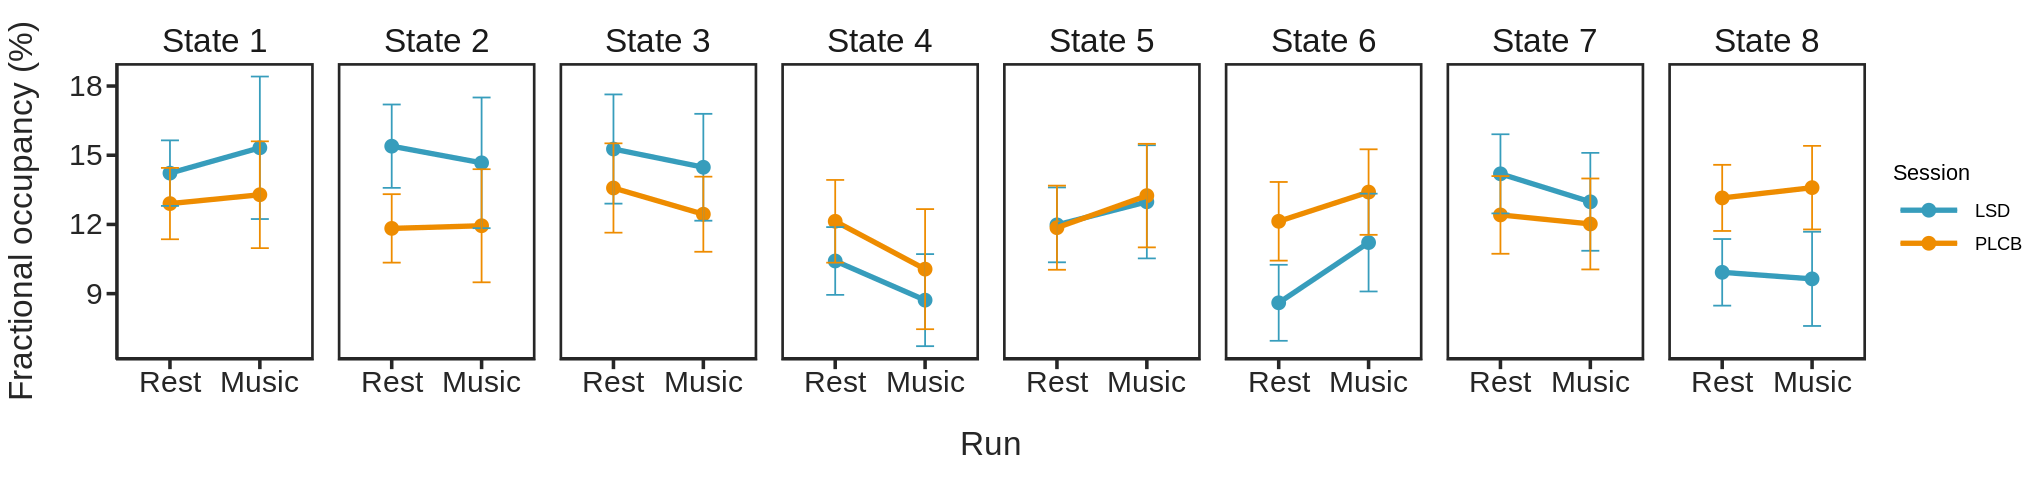

In [8]:
s8_fo_1vs2 <- ggplot(s8_data_run12, aes(x = Run, y = FO, col = Session)) +
            stat_summary(fun = "mean", geom = 'point', size = 3.5) +
            stat_summary(fun = "mean", geom = 'line', size = 1.5, aes(group = Session)) +
            stat_summary(fun.data = "mean_cl_normal", geom = 'errorbar', width = 0.2, size = 0.5) +
            ylab("Fractional occupancy (%)") +
            scale_colour_manual(values=c('#379dbc','#ee8c00')) +
            theme_training +
            theme(legend.position = "right") +
            xlab('Run') +  
            theme(panel.spacing.x = unit(1, "lines")) +
            facet_grid(~State,  labeller = labeller(State = state.names)) +
            scale_x_discrete(labels=c("1" = "Rest", "2" = "Music"))
print(s8_fo_1vs2)

In [9]:
#Saving the plot
ggsave("Figures/8_states/fo_1vs2.jpg", width = 17, height = 4)

#### Step 5.2: Plotting the results for dwell time ####

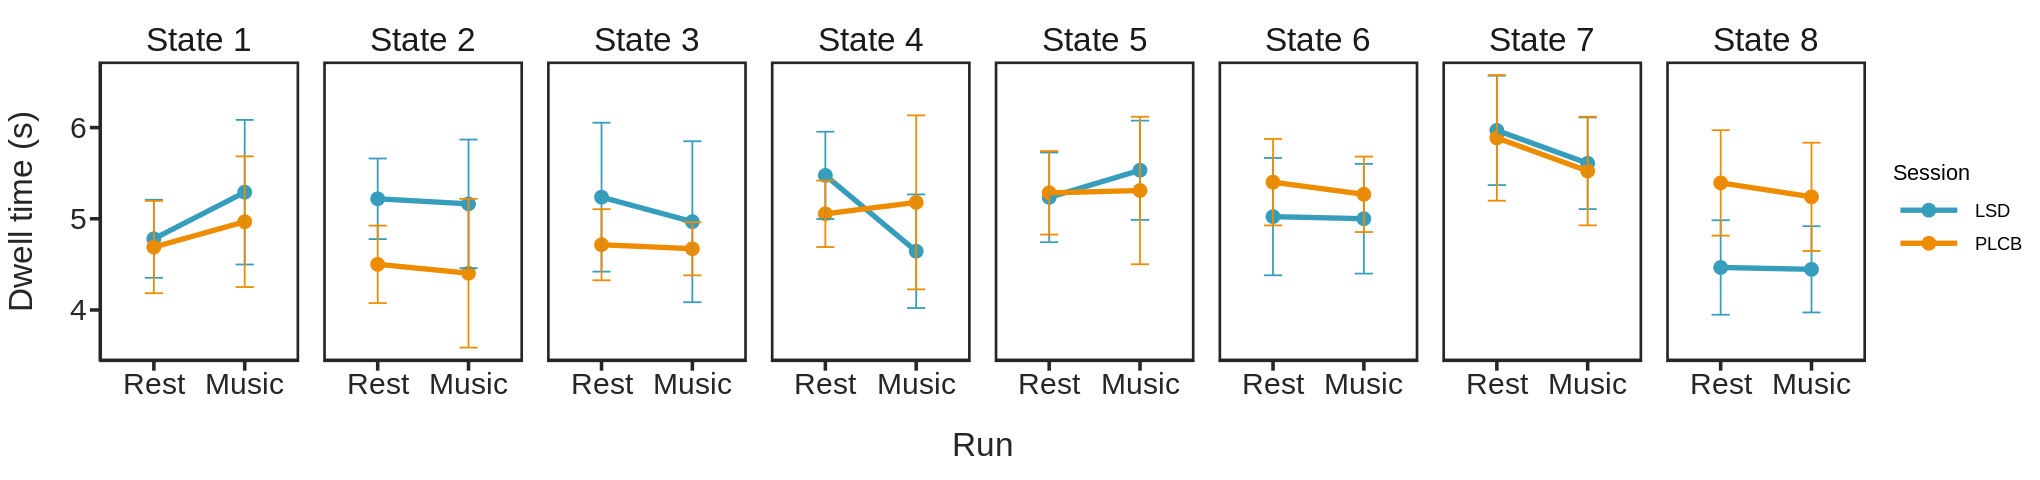

In [10]:
s8_dt_1vs2 <- ggplot(s8_data_run12, aes(x = Run, y = DT, col = Session)) +
            stat_summary(fun = "mean", geom = 'point', size = 3.5) +
            stat_summary(fun = "mean", geom = 'line', size = 1.5, aes(group = Session)) +
            stat_summary(fun.data = "mean_cl_normal", geom = 'errorbar', width = 0.2, size = 0.5) +
            ylab("Dwell time (s)") +
            scale_colour_manual(values=c('#379dbc','#ee8c00')) +
            theme_training +
            theme(legend.position = "right") +
            xlab('Run') +  
            theme(panel.spacing.x = unit(1, "lines")) +
            facet_grid(~State, labeller = labeller(State = state.names)) +
            scale_x_discrete(labels=c("1" = "Rest", "2" = "Music"))
print(s8_dt_1vs2)

In [11]:
#Saving the plot
ggsave("Figures/8_states/dt_1vs2.jpg", width = 17, height = 4)

#### **Plotting the results for resting-state before music listening vs. resting-state after music listening** ####

#### Step 5.3: Plotting the results for fractional occupancy ####

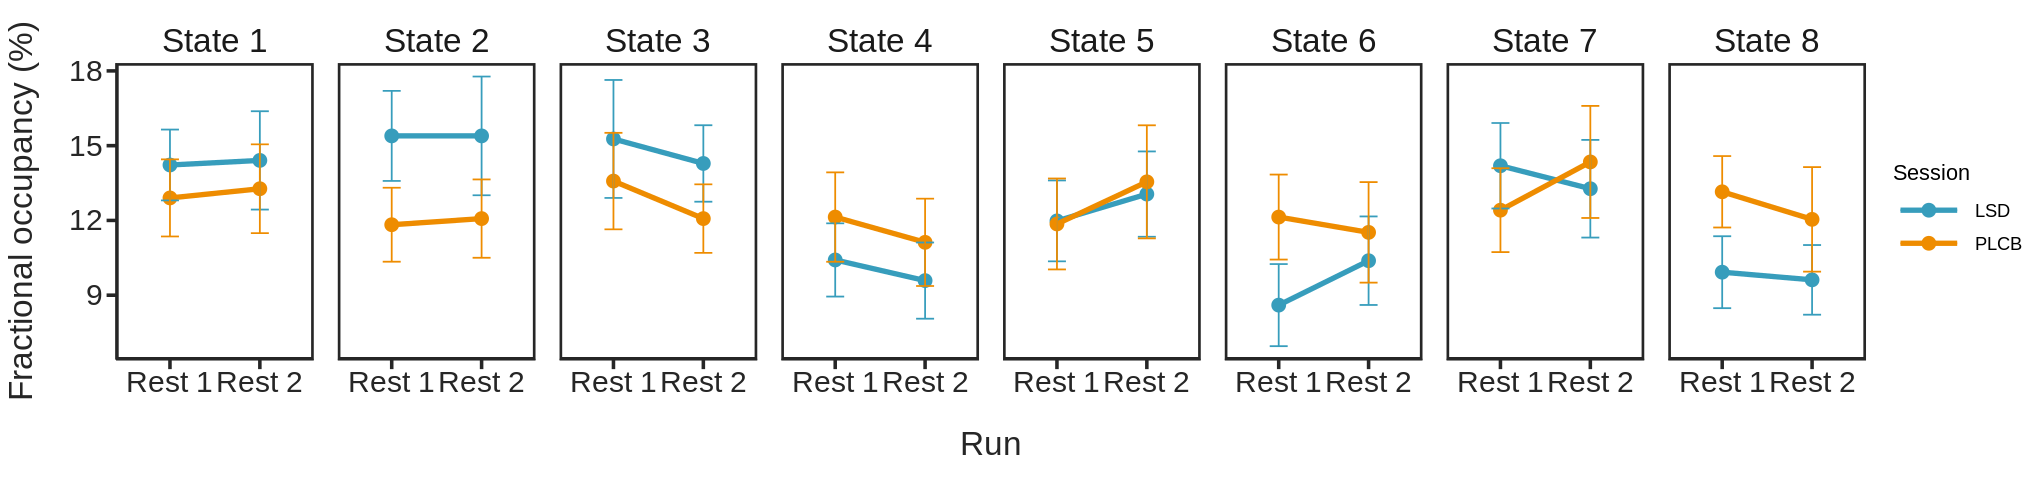

In [14]:
s8_fo_1vs3 <- ggplot(s8_data_run13, aes(x = Run, y = FO, col = Session)) +
            stat_summary(fun = "mean", geom = 'point', size = 3.5) +
            stat_summary(fun = "mean", geom = 'line', size = 1.5, aes(group = Session)) +
            stat_summary(fun.data = "mean_cl_normal", geom = 'errorbar', width = 0.2, size = 0.5) +
            ylab("Fractional occupancy (%)") +
            scale_colour_manual(values=c('#379dbc','#ee8c00')) +
            theme_training +
            theme(legend.position = "right") +
            xlab('Run') +  
            theme(panel.spacing.x = unit(1, "lines")) +
            facet_grid(~State, labeller = labeller(State = state.names)) +
            scale_x_discrete(labels=c("1" = "Rest 1", "3" = "Rest 2"))
print(s8_fo_1vs3)

In [15]:
#Saving the plot
ggsave("Figures/8_states/fo_1vs3.jpg", width = 17, height = 4)

#### Step 5.4: Plotting the results for dwell time ####

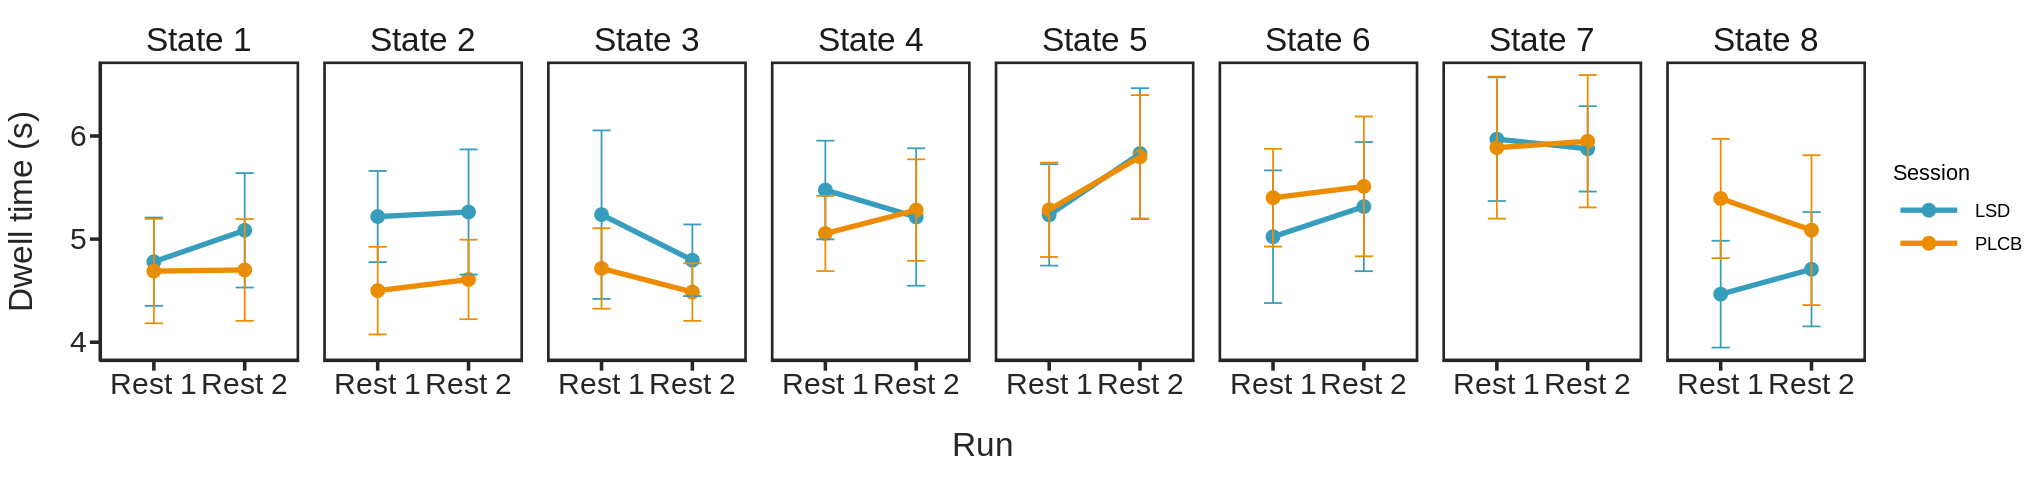

In [12]:
s8_dt_1vs3 <- ggplot(s8_data_run13, aes(x = Run, y = DT, col = Session)) +
            stat_summary(fun = "mean", geom = 'point', size = 3.5) +
            stat_summary(fun = "mean", geom = 'line', size = 1.5, aes(group = Session)) +
            stat_summary(fun.data = "mean_cl_normal", geom = 'errorbar', width = 0.2, size = 0.5) +
            ylab("Dwell time (s)") +
            scale_colour_manual(values=c('#379dbc','#ee8c00')) +
            theme_training +
            theme(legend.position = "right") +
            xlab('Run') +  
            theme(panel.spacing.x = unit(1, "lines")) +
            facet_grid(~State, labeller = labeller(State = state.names)) +
            scale_x_discrete(labels=c("1" = "Rest 1", "3" = "Rest 2"))
print(s8_dt_1vs3)

In [13]:
#Saving the plot
ggsave("Figures/8_states/dt_1vs3.jpg", width = 17, height = 4)